#Advanced Simulation

- Model of Cardiac Exectation
  - [Notations](#notation)
  - [Scitools version](#scitools)
  - [Numpy version](#numpy)
- System of Reaction Diffusion Equations
  - [Gray-Scott Model](#Gray-Scott): Different parameters, different culture. 
  
> Required Libraries:
  - scitools: especially for tools which is used to create the HTML-based animation; [movie.py](tools/movie.py) had been modified to display     animation smoothly for IPython.core.HTML;
  - numpy;
  - ffmpeg (optional);
  - ImageMagick (optional).

<h2>Model of Cardiac Excitation</h2>

\begin{eqnarray*}
  \frac{\partial e}{\partial t} & = &  \delta\nabla^2 e - k e (e-a)(e-1)-er\cr
  \frac{\partial r}{\partial t} & = &-\left[\epsilon+\frac{\mu_1 r}{\mu_2+\epsilon}\right]         [r+ke(e-b-1)]
\end{eqnarray*}
with the following initial and boundary conditions:
\begin{eqnarray*}
e(x,y,0) &=& e^0(x,y) \cr
r(x,y,0) &=& r^0(x,y) \cr
e,r(x,y,t) &=& 0 \text{ for } (x,y)\in\partial \Omega 
\end{eqnarray*}
where

- $e$: the transmembrane potential;
- $r$: the membrane conductance;
- 

- R.R Aliev, A.V. Panfilov, Chaos, Solitons and Fractals, 1996. You can find the paper by searching forit at http://scholar.google.com/
- this example come from

  *Elements of Computer Programming A Python-Based Approach for Computational Science*, **Hans Petter Langtangen, Aslak Tveito**, Simula Research Laboratory and Department of Informatics University of Oslo, Norway.


- Time partition: $T$, total time<br>
  $  dt=\triangle t=T/N$
- space partition: $h=1/(M+1)$<br>
  $ x_i= i h,y_j=j h$ where $i,j=1,2,\cdots,M+1$

<h2>Notation</h2>
<div  id="notation" />
For $\mathbf{u\in (e,r)}$:
<h3>
$$\mathbb{ u^n_{i,j}=u^n(x_i,y_j)}$$

represents the value of $u(x,y)$ at the place $(x_i,y_j)=(ih,jk)$, and at the time $n\triangle t$. 
</h3>


- initiial condition: <br>
  $$\mathbf{ e^0_{i,j}=e^0(x_i,y_j), r^0_{i,j}=r^0(x_i,y_j)}$$
- Partial Derivative to Difference Scheme: 
   - $$\mathbf{\frac{\partial e}{\partial t}\sim \frac{e^{n+1}_{i,j}-e^{n}_{i,j}}{\triangle t}, 
   \frac{\partial r}{\partial t}\sim \frac{r^{n+1}_{i,j}-r^{n}_{i,j}}{\triangle t}}$$ 
   
  -  $$\mathbf{\nabla^2 e \sim
     \frac{e^n_{i+1,j}-2e^n_{i,j}+e^n_{i-1,j}}{h^2}+\frac{e^n_{i,j}+1-2e^n_{i,j}+e^n_{i,j-1}}{h^2}}$$

<h3>Final Scheme</h3>
- let $k=h$, $\rho=\delta\triangle t/h^2$, and $n=0,1,2,\cdots$:
\begin{align}
   e^{n+1}_{i,j} &=& \rho(e^n_{i+1,j}+e^n_{i-1,j}+e^n_{i,j+1}+e^n_{i,j-1})+(1-4\rho)e^n_{i,j}\cr
                 && -\triangle t\left[ke^n_{i,j}(e^n_{i,j}-a) (e^n_{i,j}-1)+e^n_{i,j}r^n_{i,j}\right]
\end{align}
- 
\begin{align}
   r^{n+1}_{i,j} &=& r^n_{i,j} -\triangle t
   \left(\epsilon+ \frac{\mu_1 r^n_{i,j}}{\mu_2+r^n_{i,j}} \right)
   \left(r^{n}_{i,j}+ke^n_{i,j}(e^n_{i,j}-b-1)\right)
\end{align}

<h3>Computing Procedures</h2>

\begin{align}
\bf\text{ Time 0}&&\bf\text{ Time 1} \cr
e^0_{i,j},r^0_{i,j}&\longrightarrow& e^1_{i,j},r^1_{i,j}&\longrightarrow& \cdots
\end{align}

<h3> Numpy Vectorization Calculation</h3>
- efficiency low if computing one by one;
- vectorization improves better:
```python       
        (Bad)
         for i in range(n):
             do u[i+1]=f(u[i]) + ...
                         
        (Good)    
         u[1:n] += func(u[0:n-1]) + ...   
```         

<h3>Dirichelet Problem</h3>
- **Parameters**: $$\mathbf{\mathbb \mu_1=0.2, \mu_2=1.3
,k = 8.
,\epsilon = 0.01
,a = 0.12
,b = 0.1
,\delta = 0.0005
,M = N = 128,
}$$

- **Initial conditions**
$$\mathbf{
e(x,y,0)=e_0 = (1-x)^4(1-y)^4,
r(x,y,0)=r_0 = 1
}$$

- **Dirichelet Boundary Condition**
$$\mathbf{e(x,y,t)=0 = r(x,y,t)\text{ for any }(x,y)\in\partial \Omega}$$

<h3>Grids</h3>

```javascript
                 u(.,.): States at each time partition 
                 
                  inner                  inner
                    |                      |  
        (0,0),    (0,1),   (0,2),  ...,  (0,M),   (0,M+1)  
        
               ''''''''''''''''''''''''''''''''''   
        (1,0), '  (1,1),   (1,2),   ..., (1,M), ' (1,M+1)
          .    '                                '
          .    '                                '
          .    '                                '
        (M,0), '  (M,1),   (M,2),   ..., (M,M), ' (M,M+1)
               '                                '
               ''''''''''''''''''''''''''''''''''        
        (M+1,0), (M+1,1), (M+1,2), ..., (M+1,M),  (M+1,M+1)
```        
       

In [3]:
%matplotlib inline

from matplotlib import pylab as plt
import numpy as np

import sys

<div id="scitools">Scitools Version</div>

In [ ]:
from scitools.all import *
from scitools.StringFunction import StringFunction

In [3]:
""" Scitools Version"""

mu1=0.2
mu2=1.3
k = 8.
epsilon = 0.01
a = 0.12
b = 0.1
delta = 0.0005
N = 128
M = 128
e0 = '(1.-x)**4.*(1.-y)**4.'
r0 = '1'
e0 = StringFunction(e0, independent_variables=('x', 'y'))
r0 = StringFunction(r0, independent_variables=('x', 'y'))
e = zeros([M + 2, M + 2])
em = e.copy()
r = zeros([M + 2, M + 2])
rm = r.copy()
x = linspace(0, 1, M + 2)
y = linspace(0, 1, M + 2)
T = 500
t = 0
h = 1./(M + 1)
dt = 1/float(N)

<h3>Condition for Stability</h3>
The following condition ensures that the discretization scheme we use here is stable:

$$dt \leq \frac{dx^2}{2}$$

In [3]:
dt<M**2/2.

True

In [7]:
%%bash

rm -rf base/*png
mkdir base


mkdir: base: File exists


In [8]:
rho = delta*dt/h**2
# initial value 
for i in range(len(x)):
    for j in range(len(y)):
        em[i][j] = e0(x[i], y[j])
        rm[i][j] = r0(x[i], y[j])
#contourf(em, axis='tight',aspect='equal',xdata=[0,1])       

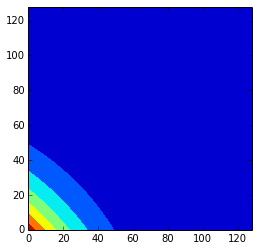

In [11]:
contourf(em, axis=[0, 128, 0, 128],daspect=[1,1,1])

In [37]:
rho = delta*dt/h**2
# initial value 
for i in range(len(x)):
    for j in range(len(y)):
        em[i][j] = e0(x[i], y[j])
        rm[i][j] = r0(x[i], y[j])
#contourf(em, axis='tight',aspect='equal',xdata=[0,1])       

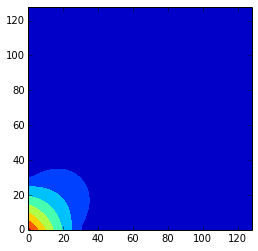

In [3]:
%matplotlib inline

while t <= T:
    if ((t%10.) < dt):
        # Plot every 10 steps
        im=contourf(em, axis=[0, 128, 0, 128],daspect=[1,1,1])
        hardcopy("base/base%04d.png" %t, dpi=75)
    # First, add inner points
    em[1:M+1, 1:M+1] += rho*(em[0:M, 1:M+1] + em[2:M+2, 1:M+1] +
    em[1:M+1, 0:M] + em[1:M+1, 2:M+2] -4*em[1:M+1, 1:M+1])
    # Secondly, add all points
    e = em - dt*(k*em*(em - a)*(em - 1) + em*rm)
    r = rm - dt*(epsilon + mu1*r/(e + mu2))*(r + k*e*(e - b - 1))
    em =e.copy()
    rm = r.copy()
    t += dt

##<div id="numpy">Numpy Version</div>

In [5]:
""" Native NumPy Version"""
mu1=0.2
mu2=1.3
k = 8.
epsilon = 0.01
a = 0.12
b = 0.1
delta = 0.0005

N = 128
M = 128

T = 500
t = 0
h = 1./(M + 1)
dt = 1/float(N)
rho = delta*dt/h**2

x = np.linspace(0, 1, M + 2)
y = np.linspace(0, 1, M + 2)
def e0(i,j):
    return (1.-x[i])**4.*(1.-y[j])**4.
def r0(i,j):
    return 1.
e = np.zeros([M + 2, M + 2])
r = np.zeros([M + 2, M + 2])
em = e.copy()
rm = r.copy()

In [6]:
rho = delta*dt/h**2
# initial value 
for i in range(len(x)):
    for j in range(len(y)):
        em[i][j] = e0(i,j)
        rm[i][j] = r0(i,j)

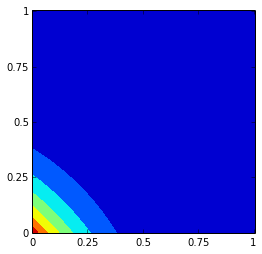

In [22]:
from matplotlib import pylab as plt

plt.figure(figsize=(4,4))
plt.xticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
plt.yticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
im=plt.contourf(em);
plt.savefig("pic%04d.png" %t, dpi=75)

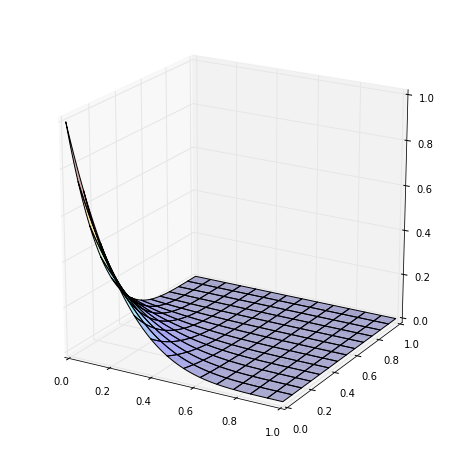

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.view_init(20, 300)
X,Y=np.meshgrid(x,y)
ax.plot_surface(X,Y, em,cmap=plt.cm.jet,alpha=0.3)
#ax.plot_wireframe(x, y, em, rstride=4, cstride=4)

In [ ]:
while t <= T:
    if ((t%10.) < dt):
        # Plot every 10 steps
        plt.figure(figsize=(4,4))
        plt.xticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
        plt.yticks([0,32,64,96,128],[0,0.25,0.5,0.75,1])
        plt.contourf(em)
        plt.savefig("base/base%04d.png" %t, dpi=75)
    # First, add inner points
    em[1:M+1, 1:M+1] += rho*(em[0:M, 1:M+1] + em[2:M+2, 1:M+1] +
    em[1:M+1, 0:M] + em[1:M+1, 2:M+2] -4*em[1:M+1, 1:M+1])
    # Secondly, add all points
    e = em - dt*(k*em*(em - a)*(em - 1) + em*rm)
    r = rm - dt*(epsilon + mu1*r/(e + mu2))*(r + k*e*(e - b - 1))
    em =e.copy()
    rm = r.copy()
    t += dt

In [6]:
movie('base/base%04d.png',encoder='ffmpeg', fps=20, vcodec='libvpx', quiet=True,
           output_file='chaostic.webm')




Found 51 files of the format base/base%04d.png.


In [3]:
import os
from scitools.all import *
movie("base/base*.png", encoder='html', fps=20, output_file='base.html')




Found 51 files of the format base/base*.png.

Making HTML code for displaying base/base0000.png, base/base0010.png, base/base0020.png, base/base0030.png, base/base0040.png, base/base0050.png, base/base0060.png, base/base0070.png, base/base0080.png, base/base0090.png, base/base0100.png, base/base0110.png, base/base0120.png, base/base0130.png, base/base0140.png, base/base0150.png, base/base0160.png, base/base0170.png, base/base0180.png, base/base0190.png, base/base0200.png, base/base0210.png, base/base0220.png, base/base0230.png, base/base0240.png, base/base0250.png, base/base0260.png, base/base0270.png, base/base0280.png, base/base0290.png, base/base0300.png, base/base0310.png, base/base0320.png, base/base0330.png, base/base0340.png, base/base0350.png, base/base0360.png, base/base0370.png, base/base0380.png, base/base0390.png, base/base0400.png, base/base0410.png, base/base0420.png, base/base0430.png, base/base0440.png, base/base0450.png, base/base0460.png, base/base0470.png, base/ba

In [ ]:
movie('base/base*.png',encoder='ffmpeg', fps=20, vcodec='libx264', quiet=True,
           output_file='chaostic.mp4')

In [ ]:
%%bash

ffmpeg chastic.webm -i base/base*.png -c:v libvpx -aframes 20  

In [ ]:
%%bash

ffmpeg -framerate 20 -i base/base*.png  -c:v libx264   chaostic.mp4

<h2>Note about Movie</h2>

Scittols uses ffmpeg (and ImageMagick/convert) to make animation by default, but It can't work in our Mac Laptops. It can be solved by the replacement "html":

```python
     from scitools.all import *
     movie('base*.png', encoder='html', fps=20,output_file='tmpmovie.html')
```     

In [4]:
from IPython.core.display import HTML
filename="base.html"
HTML('<div align="center"><iframe src=%s width=460, height=400></iframe></div>' %filename)

In [4]:
from IPython.core.display import HTML
video = open("chaostic.webm", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/webm;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

<h2>What happens with the following parameters</h2>

$\mathbb \mu_1=0.07, \mu_2=0.3
,k = 8.
,\epsilon = 0.01
,a = 0.1
,b = 0.1
,\delta = 0.000025
,N = 128
,M = 128$

- Neuman Condition:
Here are two formulas; the first is 1st-order accurate and the second is 2nd-order accurate:

$$u'(0) \approx \frac{U_1-U_0}{h}$$

$$u'(0) \approx -\frac{1}{h}\left(\frac{3}{2}U_0 - 2U_1 + \frac{1}{2}U_2\right)$$

- $\nabla_{\vec n}u|_{\partial \Omega}=0\to (u_x,u_y)|_{\partial \Omega}=0$
  $$ u_{1,0}^k-u_{0,0}^k=0, u_{1,0}^k-u_{0,0}^k=0$$

<h2>What happens with the following parameters</h2>

$\mathbb \mu_1=0.07, \mu_2=0.3
,k = 8.
,\epsilon = 0.01
,a = 0.1
,b = 0.1
,\delta = 0.00005
,N = 128
,M = 128$

- Neuman Condition:
Here are two formulas; the first is 1st-order accurate and the second is 2nd-order accurate:

$$u'(0) \approx \frac{U_1-U_0}{h}$$

$$u'(0) \approx -\frac{1}{h}\left(\frac{3}{2}U_0 - 2U_1 + \frac{1}{2}U_2\right)$$

- $\mathbf{ \nabla_{\vec n}u|_{\partial \Omega}= 0\to (u_x,u_y)|_{\partial \Omega}=\vec0}$
  \begin{align}
     u_{1,y}^k-u_{0,y}^k&=&0, u_{-1,y}^k-u_{-2,y}^k=0 \\
     u_{x,1}^k-u_{x,0}^k&=&0, u_{x,-1}^k-u_{x,-2}^k=0 
  \end{align}   

In [7]:
from scitools.all import *
from scitools.StringFunction import StringFunction
import sys

In [8]:
mu1=0.11
mu2=0.3
k = 8.
epsilon = 0.01
a = 0.1
b = 0.1
delta = 0.00005
N = 128
M = 128
e0 = '(1-x)**4*(1-y)**4'
r0 = '1'
e0 = StringFunction(e0, independent_variables=('x', 'y'))
r0 = StringFunction(r0, independent_variables=('x', 'y'))
e = zeros([M + 2, M + 2])
em = e.copy()
r = zeros([M + 2, M + 2])
rm = r.copy()
x = linspace(0, 1, M + 2)
y = linspace(0, 1, M + 2)
T = 500
t = 0
h = 1./(M + 1)
dt = 1/float(N)
rho = delta*dt/h**2

In [9]:
# initial value 
for i in range(len(x)):
    for j in range(len(y)):
        em[i][j] = e0(x[i], y[j])
        rm[i][j] = r0(x[i], y[j])
#contourf(em, axis='tight',aspect='equal',xdata=[0,1])       

In [10]:
%%bash

dirname="base2"

rm -rf base2
mkdir base2

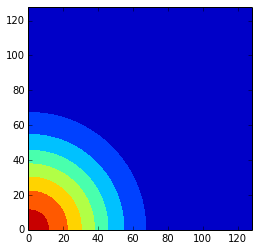

In [11]:
%matplotlib inline

while t <= T:
    if ((t%10.) < dt):
        # Plot every 10 steps
        im=contourf(em, axis=[0, 128, 0, 128],daspect=[1,1,1])
        hardcopy("base2/base%04d.png" %t, dpi=75)
    # First, add inner points
    em[1:M+1, 1:M+1] += rho*(em[0:M, 1:M+1] + em[2:M+2, 1:M+1] +
    em[1:M+1, 0:M] + em[1:M+1, 2:M+2] -4*em[1:M+1, 1:M+1])
    # Secondly, add all points
    e = em - dt*(k*em*(em - a)*(em - 1) + em*rm)
    r = rm - dt*(epsilon + mu1*r/(e + mu2))*(r + k*e*(e - b - 1))
    """
    for Z in (e,r):
        Z[0,:] = Z[1,:]
        Z[-1,:] = Z[-2,:]
        Z[:,0] = Z[:,1]
        Z[:,-1] = Z[:,-2]
    """
    e[0,:] = e[1,:]
    e[-1,:] = e[-2,:]
    e[:,0] = e[:,1]
    e[:,-1] = e[:,-2]
    
    em =e.copy()
    rm = r.copy()
    t += dt

In [1]:
import os
from scitools.all import *
movie("base2/base*.png", encoder='html', fps=20, output_file='base2.html')




Found 51 files of the format base2/base*.png.

Making HTML code for displaying base2/base0000.png, base2/base0010.png, base2/base0020.png, base2/base0030.png, base2/base0040.png, base2/base0050.png, base2/base0060.png, base2/base0070.png, base2/base0080.png, base2/base0090.png, base2/base0100.png, base2/base0110.png, base2/base0120.png, base2/base0130.png, base2/base0140.png, base2/base0150.png, base2/base0160.png, base2/base0170.png, base2/base0180.png, base2/base0190.png, base2/base0200.png, base2/base0210.png, base2/base0220.png, base2/base0230.png, base2/base0240.png, base2/base0250.png, base2/base0260.png, base2/base0270.png, base2/base0280.png, base2/base0290.png, base2/base0300.png, base2/base0310.png, base2/base0320.png, base2/base0330.png, base2/base0340.png, base2/base0350.png, base2/base0360.png, base2/base0370.png, base2/base0380.png, base2/base0390.png, base2/base0400.png, base2/base0410.png, base2/base0420.png, base2/base0430.png, base2/base0440.png, base2/base0450.png

In [2]:
from IPython.core.display import HTML

HTML('<div align="center"><iframe src=base2.html width=480, height=400></iframe></div>')

In [33]:
%%bash

pwd

/Users/cchcch/Desktop/IPython Notebook/math-2014/6/base


In [7]:
movie('base/base*.png',encoder='ffmpeg', fps=20, vcodec='libvpx', quiet=True,
           output_file='chaostic2.webm')




Found 50 files of the format base/base*.png.


In [8]:
from IPython.core.display import HTML
video = open("chaostic2.webm", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/webm;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

# Gray-Scott Models:
<div id="Gray-Scott" />

\begin{eqnarray*}
  \frac{\partial U}{\partial t} & = & r_u\nabla^2 U -u v^2 +f(1-u) \cr
  \frac{\partial V}{\partial t} & = & r_v\nabla^2 V +u v^2 -(f+k)v 
\end{eqnarray*}
where $U, V$ is chemical spcies<br />
**Ref: **
    1. Complex Patterns in a Simple System, John E. Pearson, Science 261, 5118, 189-192, 1993.
    2.  Gray Scott Model of Reaction Diffusion, Abelson, Adams, Coore, Hanson, Nagpal, Sussman, http://http://groups.csail.mit.edu/mac/projects/amorphous/GrayScott/
    3. Nicolas P. Rougier, http://www.loria.fr/~rougier/teaching/index.html

In [13]:
import numpy as np
from math import sin,cos,pi 
from scipy.integrate import ode,odeint
import matplotlib.pylab as plt
from matplotlib import animation
from JSAnimation import IPython_display
from ipywidgets import StaticInteract, RangeWidget,RadioWidget
from IPython.display import clear_output
import time,random
from scitools.all import movie
from IPython.html import widgets # Widget definitions
from IPython.display import display # Used to display widgets in the notebook
import os

In [14]:
directory = "imgs"
if not os.path.exists(directory):
    os.makedirs(directory)      

In [25]:
n  = 200
#Du, Dv, F, k = 0.16, 0.08, 0.035, 0.065 # Bacteria 1
# Du, Dv, F, k = 0.14, 0.06, 0.035, 0.065 # Bacteria 2
# Du, Dv, F, k = 0.16, 0.08, 0.060, 0.062 # Coral
# Du, Dv, F, k = 0.19, 0.05, 0.060, 0.062 # Fingerprint
# Du, Dv, F, k = 0.10, 0.10, 0.018, 0.050 # Spirals
# Du, Dv, F, k = 0.12, 0.08, 0.020, 0.050 # Spirals Dense
# Du, Dv, F, k = 0.10, 0.16, 0.020, 0.050 # Spirals Fast
# Du, Dv, F, k = 0.16, 0.08, 0.020, 0.055 # Unstable
# Du, Dv, F, k = 0.16, 0.08, 0.050, 0.065 # Worms 1
# Du, Dv, F, k = 0.16, 0.08, 0.054, 0.063 # Worms 2
#Du, Dv, F, k = 0.16, 0.08, 0.035, 0.060 # Zebrafish
parameters=np.array([0.16, 0.08, 0.050, 0.065])

In [37]:
def GrayScott(parameters,title):
    
    Du=parameters[0];Dv=parameters[1];F=parameters[2];k=parameters[3];
    Z = np.zeros((n+2,n+2), [('U', np.double), ('V', np.double)])
    U,V = Z['U'], Z['V']
    u,v = U[1:-1,1:-1], V[1:-1,1:-1]

    r = 20
    u[...] = 1.0
    U[n/2-r:n/2+r,n/2-r:n/2+r] = 0.50
    V[n/2-r:n/2+r,n/2-r:n/2+r] = 0.25
    u += 0.05*np.random.random((n,n))
    v += 0.05*np.random.random((n,n))
    
    size = np.array(Z.shape)
    dpi = 72.0
    figsize= size[1]/float(dpi),size[0]/float(dpi)
    
    fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
    fig.suptitle(title,color='red',fontsize=16)
    fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
    #im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.gray_r)
    im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.BuGn)
    plt.xticks([]), plt.yticks([])
    
    for i in xrange(25000):
        Lu = (U[0:-2,1:-1] +U[1:-1,0:-2] - 4*U[1:-1,1:-1] + U[1:-1,2:] +U[2:  ,1:-1] )
        Lv = (V[0:-2,1:-1] +V[1:-1,0:-2] - 4*V[1:-1,1:-1] + V[1:-1,2:] +V[2:  ,1:-1] )

        uvv = u*v*v
        u += (Du*Lu - uvv +  F *(1-u))
        v += (Dv*Lv + uvv - (F+k)*v)

        if i % 100 == 0:
           im.set_data(V)
           im.set_clim(vmin=V.min(), vmax=V.max())
           #plt.draw()
           # To make movie
           plt.savefig("imgs/tmp-%03d.png" % (i/100) ,dpi=dpi)
    #movie('imgs/tmp*.png',encoder='ffmpeg', fps=20, vcodec='libvpx', quiet=True,
    #       output_file='GrayScott.webm')

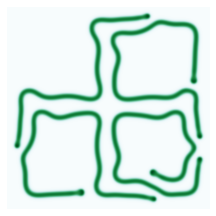

In [39]:
GrayScott(parameters,title='')

In [28]:
from IPython.core.display import HTML
filename="imgs-1/tmpmovie.html"

HTML('<div align="center"><iframe src=%s width=400, height=320></iframe></div>' %filename)

In [8]:
movie('imgs/tmp*.png',encoder='ffmpeg', fps=20, vcodec='libvpx', quiet=True,
           output_file='GrayScott.webm')




Found 250 files of the format imgs/tmp*.png.


In [9]:
from IPython.core.display import HTML
video = open("GrayScott.webm", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/webm;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

In [34]:
mysecondwidget = widgets.RadioButtons(values=["Bacteria1","Bacteria2", "Coral","Fingerprint",  
                                            "Spirals", "Sprials Dense","Sprials Fast","Unstable",
                                            "Worms1", "Worms2","Zebrafish"],value="Worms1")
display(mysecondwidget)

In [35]:
if (mysecondwidget.value=='Bacteria1'):
     parameter= np.array([0.16, 0.08, 0.035, 0.065]);
elif (mysecondwidget.value=='Bacteria2'):
     parameter= np.array([0.14, 0.06, 0.035, 0.065]);        
elif (mysecondwidget.value=='Coral'):
     parameters= np.array([0.16, 0.08, 0.054, 0.063 ]);         
elif (mysecondwidget.value=='Fingerprint'):
     parameters= np.array([0.19, 0.05, 0.060, 0.062  ]); 
elif (mysecondwidget.value=='Sprials'):
     parameters= np.array([0.10, 0.10, 0.018, 0.050  ]);
elif (mysecondwidget.value=='Sprials Dense'):
     parameters= np.array([0.12, 0.08, 0.020, 0.050 ]); 
elif (mysecondwidget.value=='Sprials Fast'):
     parameters= np.array([0.10, 0.16, 0.020, 0.050 ]);  
elif (mysecondwidget.value=='Unstable'):
     parameters= np.array([0.16, 0.08, 0.020, 0.055  ]); 
elif (mysecondwidget.value=='Worms1'):
     parameter= np.array([0.16, 0.08, 0.050, 0.065]);
elif (mysecondwidget.value=='Worms2'):
     parameters= np.array([0.16, 0.08, 0.054, 0.063 ]);        
elif (mysecondwidget.value=='Zebrafish'):
     parameters= np.array([0.16, 0.08, 0.035, 0.060 ]);          

In [38]:
GrayScott(parameters,mysecondwidget.value)

In [19]:
from IPython.core.display import HTML
video = open("GrayScott.webm", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/webm;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

In [19]:
fwidget = widgets.FloatSlider(description='f value:', min='0.01', max='0.05', step='0.001', value='0.024')
kwidget = widgets.FloatSlider(description='k value:', min='0.04', max='0.07', step='0.005', value='0.055')


In [26]:
display(fwidget)
display(kwidget)

In [27]:
parameters=np.array([fwidget.value,kwidget.value])

In [28]:
parameters

array([ 0.024,  0.055])

In [29]:
def GrayScott2(parameters):
    
    Du=0.01;Dv=0.005;F=parameters[0];k=parameters[1];
    Z = np.zeros((n+2,n+2), [('U', np.double), ('V', np.double)])
    U,V = Z['U'], Z['V']
    u,v = U[1:-1,1:-1], V[1:-1,1:-1]

    r = 4
    u[...] = 1.0
    U[n/2-r:n/2+r,n/2-r:n/2+r] = 0.50
    V[n/2-r:n/2+r,n/2-r:n/2+r] = 0.25
    #u += 0.05*np.random.random((n,n))
    #v += 0.05*np.random.random((n,n))
    
    size = np.array(Z.shape)
    dpi = 72.0
    figsize= size[1]/float(dpi),size[0]/float(dpi)
    
    fig = plt.figure(figsize=figsize, dpi=dpi, facecolor="white")
    fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
    #im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.gray_r)
    im = plt.imshow(V, interpolation='bicubic', cmap=plt.cm.BuGn)
    plt.xticks([]), plt.yticks([])
    
    for i in xrange(25000):
        Lu = (U[0:-2,1:-1] +U[1:-1,0:-2] - 4*U[1:-1,1:-1] + U[1:-1,2:] +U[2:  ,1:-1] )
        Lv = (V[0:-2,1:-1] +V[1:-1,0:-2] - 4*V[1:-1,1:-1] + V[1:-1,2:] +V[2:  ,1:-1] )

        uvv = u*v*v
        u += (Du*Lu - uvv +  F *(1-u))
        v += (Dv*Lv + uvv - (F+k)*v)

        if i % 100 == 0:
           im.set_data(V)
           im.set_clim(vmin=V.min(), vmax=V.max())
           #plt.draw()
           # To make movie
           plt.savefig("imgs/tmp-%03d.png" % (i/100) ,dpi=dpi)
    movie('imgs/tmp*.png',encoder='ffmpeg', fps=20, vcodec='libvpx', quiet=True,
           output_file='GrayScott.webm')

In [ ]:
GrayScott2(parameters)

In [2]:
from IPython.core.display import HTML
filename="imgs/tmpmovie.html"

HTML('<div align="center"><iframe src=%s width=400, height=320></iframe></div>' %filename)

In [184]:
from IPython.core.display import HTML
video = open("GrayScott.webm", "rb").read()
video_encoded = video.encode("base64")
video_tag = '<video controls alt="test" src="data:video/webm;base64,{0}">'.format(video_encoded)
HTML(data=video_tag)

In [1]:
%matplotlib inline

In [2]:
import numpy
from scipy import integrate
from matplotlib import pyplot
numpy.set_printoptions(precision=3)

In [3]:
L = 1.
J = 100
dX = float(L)/float(J)
X_grid = numpy.array([float(dX)/2. + j*dX for j in range(J)])
x_grid = numpy.array([j*dX for j in range(J+1)])

T = 200
N = 1000
dt = float(T)/float(N-1)
t_grid = numpy.array([n*dt for n in range(N)])


D_v = float(10.)/float(100.)
D_u = 0.01 * D_v

In [4]:
k0 = 0.067
f_vec = lambda U, V: numpy.multiply(dt, numpy.subtract(numpy.multiply(V, 
                     numpy.add(k0, numpy.divide(numpy.multiply(U,U), numpy.add(1., numpy.multiply(U,U))))), U))


In [5]:
total_protein = 2.26

no_high = 10
U = numpy.array([0.1 for i in range(no_high,J)] + [2. for i in range(0,no_high)])
V = numpy.array([float(total_protein-dX*sum(U))/float(J*dX) for i in range(0,J)])
g = numpy.array([1. for j in range(J)])
a = lambda U: numpy.array([0.001*X_grid[j]*U[j] for j in range(J)])

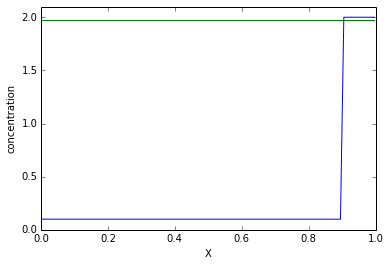

In [6]:
pyplot.ylim((0., 2.1))
pyplot.xlabel('X'); pyplot.ylabel('concentration')
pyplot.plot(X_grid, U)
pyplot.plot(X_grid, V)

In [5]:
%%bash 

ipython nbconvert --to html reactiondiff-2.ipynb

[NbConvertApp] Using existing profile dir: u'/Users/cch/.ipython/profile_default'
[NbConvertApp] Converting notebook reactiondiff-2.ipynb to html
[NbConvertApp] Support files will be in reactiondiff-2_files/
[NbConvertApp] Loaded template full.tpl
[NbConvertApp] Writing 2374263 bytes to reactiondiff-2.html
